In [1]:
import os
import sys
sys.path.append('..')

import scanpy
import numpy as np
import scipy.sparse as sp

# import torch
# from torch import optim
# from torch.utils.data import DataLoader

import models.modelsCNN as modelsCNN
import models.optimizer as optimizer

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
from skimage import io
import scipy.stats
import utils.plot

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples

import anndata as ann
import networkx as nx
import models.clusterUtils

/home/xzhang/anaconda3/envs/c2p/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
# os.environ["CUDA_VISIBLE_DEVICES"] = '0'
savedir_processed='/media/xinyi/T7 Shield/neuro/processed'
resDir='/media/xinyi/T7 Shield/neuro/results/plots/cnnvaeexp0_segNucall'
resolution='5'
with open(os.path.join(resDir,'leiden_res'+resolution), 'rb') as output:
    jointPartition=pickle.load(output)

In [3]:
with open(os.path.join(savedir_processed,'allLatent_dapi_epoch199_nucSeg'), 'rb') as output:
    latent_dapi=pickle.load(output)
with open(os.path.join(savedir_processed,'allLatent_gfap_epoch799_minmax'), 'rb') as output:
    latent_gfap=pickle.load(output)
with open(os.path.join(savedir_processed,'allLatent_map2_epoch799_minmax'), 'rb') as output:
    latent_map2=pickle.load(output)
with open(os.path.join(savedir_processed,'allLatent_lmnb_epoch199_nucSeg'), 'rb') as output:
    latent_lmnb=pickle.load(output)

In [4]:
with open(os.path.join(savedir_processed,'allLatent_epoch458_nucSeg'), 'rb') as output:
    latent_all=pickle.load(output)

In [5]:
#plot PC variance
n_pcs=600
pca_dapi=PCA(n_components=n_pcs)
latent_dapi_pca=pca_dapi.fit(latent_dapi)

pca_gfap=PCA(n_components=n_pcs)
latent_gfap_pca=pca_gfap.fit(latent_gfap)

pca_map2=PCA(n_components=n_pcs)
latent_map2_pca=pca_map2.fit(latent_map2)

pca_lmnb=PCA(n_components=n_pcs)
latent_lmnb_pca=pca_lmnb.fit(latent_lmnb)

In [8]:
savedir_baseline='/media/xinyi/T7 Shield/neuro/results/jointClustering/baseline/res'+resolution
if not os.path.exists(savedir_baseline):
    os.mkdir(savedir_baseline)

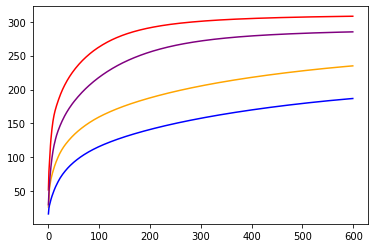

In [9]:
var_dapi_cumsum=np.cumsum(latent_dapi_pca.explained_variance_)
var_gfap_cumsum=np.cumsum(latent_gfap_pca.explained_variance_)
var_map2_cumsum=np.cumsum(latent_map2_pca.explained_variance_)
var_lmnb_cumsum=np.cumsum(latent_lmnb_pca.explained_variance_)

plt.plot(np.arange(n_pcs),var_dapi_cumsum,c='red')
plt.plot(np.arange(n_pcs),var_gfap_cumsum,c='orange')
plt.plot(np.arange(n_pcs),var_map2_cumsum,c='blue')
plt.plot(np.arange(n_pcs),var_lmnb_cumsum,c='purple')
plt.savefig(os.path.join(savedir_baseline,'pca_var_cumsum.jpg'))

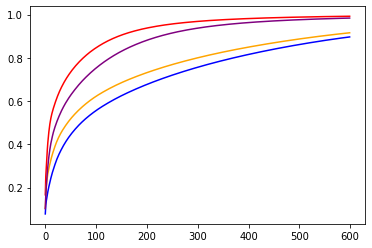

In [10]:
var_dapi_cumsum=np.cumsum(latent_dapi_pca.explained_variance_ratio_)
var_gfap_cumsum=np.cumsum(latent_gfap_pca.explained_variance_ratio_)
var_map2_cumsum=np.cumsum(latent_map2_pca.explained_variance_ratio_)
var_lmnb_cumsum=np.cumsum(latent_lmnb_pca.explained_variance_ratio_)

plt.plot(np.arange(n_pcs),var_dapi_cumsum,c='red')
plt.plot(np.arange(n_pcs),var_gfap_cumsum,c='orange')
plt.plot(np.arange(n_pcs),var_map2_cumsum,c='blue')
plt.plot(np.arange(n_pcs),var_lmnb_cumsum,c='purple')
plt.savefig(os.path.join(savedir_baseline,'pca_varRatio_cumsum.jpg'))

In [11]:
def plot_metric(partition,latent,n_pcs=200,n_neighbors=15,resolution=1):
    latent_s_ann=ann.AnnData(latent)
    scanpy.tl.pca(latent_s_ann,n_comps=n_pcs)
    scanpy.pp.neighbors(latent_s_ann,n_neighbors=n_neighbors,n_pcs=n_pcs)
    graph_s=nx.from_scipy_sparse_matrix(latent_s_ann.obsp['connectivities'])
    partition_curr=[None]*np.unique(partition).size
    for p in np.unique(partition):
        partition_curr[p]=np.arange(partition.size)[partition==p]
    modularity_byCluster=models.clusterUtils.modularity_perCommunity(partition_curr,graph_s,resolution=resolution)
    
    silhouette=silhouette_samples(latent_s_ann.obsm['X_pca'],partition)
    
    return modularity_byCluster,silhouette

In [12]:
modAll,silAll=plot_metric(jointPartition,latent_all)
moddapi,sildapi=plot_metric(jointPartition,latent_dapi)
modmap2,silmap2=plot_metric(jointPartition,latent_map2)
modgfap,silgfap=plot_metric(jointPartition,latent_gfap)
modlmnb,sillmnb=plot_metric(jointPartition,latent_lmnb)

<ipython-input-11-31025f1aa8d8>:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  latent_s_ann=ann.AnnData(latent)
<ipython-input-11-31025f1aa8d8>:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  latent_s_ann=ann.AnnData(latent)
<ipython-input-11-31025f1aa8d8>:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  latent_s_ann=ann.AnnData(latent)
<ipython-input-11-31025f1aa8d8>:2: FutureWa

In [16]:
silAll_mean=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    silAll_mean[c]=np.mean(silAll[jointPartition==c])

In [17]:
sildapi_mean=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    sildapi_mean[c]=np.mean(sildapi[jointPartition==c])

In [18]:
silgfap_mean=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    silgfap_mean[c]=np.mean(silgfap[jointPartition==c])

In [19]:
silmap2_mean=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    silmap2_mean[c]=np.mean(silmap2[jointPartition==c])

In [20]:
sillmnb_mean=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    sillmnb_mean[c]=np.mean(sillmnb[jointPartition==c])

In [23]:
silAll_pos=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    silAll_pos[c]=np.sum(silAll[jointPartition==c]>0)/np.sum(jointPartition==c)
sildapi_pos=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    sildapi_pos[c]=np.sum(sildapi[jointPartition==c]>0)/np.sum(jointPartition==c)
silmap2_pos=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    silmap2_pos[c]=np.sum(silmap2[jointPartition==c]>0)/np.sum(jointPartition==c)
silgfap_pos=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    silgfap_pos[c]=np.sum(silgfap[jointPartition==c]>0)/np.sum(jointPartition==c)
sillmnb_pos=np.zeros(np.unique(jointPartition).size)
for c in np.unique(jointPartition):
    sillmnb_pos[c]=np.sum(sillmnb[jointPartition==c]>0)/np.sum(jointPartition==c)

In [35]:
#robustness
nsamples=10
leidenResAll=np.zeros((latent_all.shape[0],nsamples)).astype(int)
n_pcs_all=50
n_neighbors=10
pca_all=PCA(n_components=n_pcs_all)
latent_all_pca=pca_all.fit_transform(latent_all)
latent_ann=ann.AnnData(latent_all_pca)
scanpy.pp.neighbors(latent_ann,n_neighbors=n_neighbors,n_pcs=None)

for s in range(nsamples):
    scanpy.tl.leiden(latent_ann,resolution=int(resolution),random_state=s)

    leidenResAll[:,s]=latent_ann.obs['leiden'].astype(int)

<ipython-input-35-9d69629d5e98>:8: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  latent_ann=ann.AnnData(latent_all_pca)


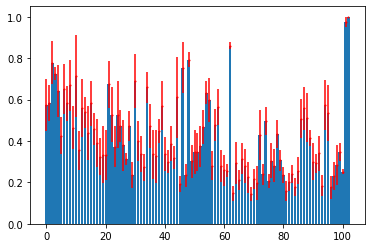

In [36]:
#avg %cells in the same cluster
leidenJoint_overlap=np.zeros((np.unique(jointPartition).size,nsamples))
for cj in np.unique(jointPartition):
    for s in range(nsamples):
        _,counts=np.unique(leidenResAll[jointPartition==cj,s],return_counts=True)
        leidenJoint_overlap[cj,s]=np.max(counts)/np.sum(jointPartition==cj)

overlap_mean=np.mean(leidenJoint_overlap,axis=1)
overlap_std=np.std(leidenJoint_overlap,axis=1)
plt.bar(np.arange(np.unique(jointPartition).size),overlap_mean)
plt.errorbar(np.arange(np.unique(jointPartition).size),overlap_mean,yerr=overlap_std,fmt='o',ms=1,color='r')
plt.savefig(os.path.join(savedir_baseline,'robustness_fracOverlap.jpg'))

In [38]:
#10 random partitions
randomAll=np.zeros((latent_all.shape[0],nsamples)).astype(int)

for s in range(nsamples):
    randomS=np.copy(jointPartition)
    np.random.seed(s)
    np.random.shuffle(randomS)

    randomAll[:,s]=randomS

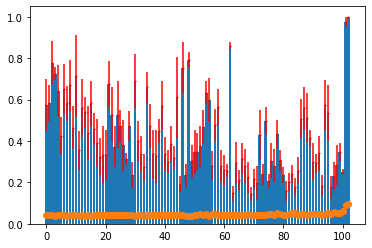

In [39]:
#avg %cells in the same cluster
leidenJoint_overlap_random=np.zeros((np.unique(jointPartition).size,nsamples))
for cj in np.unique(jointPartition):
    for s in range(nsamples):
        _,counts=np.unique(randomAll[jointPartition==cj,s],return_counts=True)
        leidenJoint_overlap_random[cj,s]=np.max(counts)/np.sum(jointPartition==cj)

overlap_mean_random=np.mean(leidenJoint_overlap_random,axis=1)
overlap_std_random=np.std(leidenJoint_overlap_random,axis=1)
plt.bar(np.arange(np.unique(jointPartition).size),overlap_mean)
plt.errorbar(np.arange(np.unique(jointPartition).size),overlap_mean,yerr=overlap_std,fmt='o',ms=1,color='r')

plt.scatter(np.arange(np.unique(jointPartition).size),overlap_mean_random)
plt.savefig(os.path.join(savedir_baseline,'robustness_fracOverlap_wRandom.jpg'))
plt.show()

In [33]:

with open(os.path.join(savedir_baseline,'pca_dapi_600'), 'wb') as output:
    pickle.dump(pca_dapi, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'pca_gfap_600'), 'wb') as output:
    pickle.dump(pca_gfap, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'pca_map2_600'), 'wb') as output:
    pickle.dump(pca_map2, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'pca_lmnb_600'), 'wb') as output:
    pickle.dump(pca_lmnb, output, pickle.HIGHEST_PROTOCOL)

In [40]:
with open(os.path.join(savedir_baseline,'modAll'), 'wb') as output:
    pickle.dump(modAll, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'silAll'), 'wb') as output:
    pickle.dump(silAll, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'moddapi'), 'wb') as output:
    pickle.dump(moddapi, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'sildapi'), 'wb') as output:
    pickle.dump(sildapi, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'modgfap'), 'wb') as output:
    pickle.dump(modgfap, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'silgfap'), 'wb') as output:
    pickle.dump(silgfap, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'modmap2'), 'wb') as output:
    pickle.dump(modmap2, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'silmap2'), 'wb') as output:
    pickle.dump(silmap2, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'modlmnb'), 'wb') as output:
    pickle.dump(modlmnb, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'sillmnb'), 'wb') as output:
    pickle.dump(sillmnb, output, pickle.HIGHEST_PROTOCOL)
with open(os.path.join(savedir_baseline,'leidenRes5_10samples'), 'wb') as output:
    pickle.dump(leidenResAll, output, pickle.HIGHEST_PROTOCOL)
    